In [1]:
import numpy as np
from scipy.misc import factorial
import pylab as pl

### Define input space

In [2]:
# maps inputs to an index, such tha each input has a unique index
class input_space:
    
    def __init__(self):
        self.w2i = {}
        self.i2w = []
    
    def append(self,f):
        if f in self.w2i:
            ind = self.w2i[f]
        else:
            ind = len(self.i2w)
            self.w2i[f] = ind
            self.i2w.append(f)
        
i_s = input_space()
input = {'names': ['a', 'b', 'c']}
for i in range(len(input['names'])):
    i_s.append(input['names'][i])
    
input['values'] = np.zeros(len(input['names']), dtype=int)
print input

print i_s.i2w
print i_s.w2i

{'values': array([0, 0, 0]), 'names': ['a', 'b', 'c']}
['a', 'b', 'c']
{'a': 0, 'c': 2, 'b': 1}


### Create neuron class

In [3]:
class Neuron:
    
    def __init__(self, name, value):
        self.name = name
        self.value = value
        
    def leaky_integrator(self, s):
        self.s = s
        
    def gate(self, n1, n2):
        self.n1 = n1
        
    #def weighted_sum(self):
        

### Create program class

In [4]:
class Program:
    
    def __init__(self, sequence=[]):
        self.sequence = sequence
        
        
    #def run(self):
    #    self.M = 

In [13]:
scan = Program(sequence={'names': ['current_item', 'gate'], 'order': [0, 1]})

In [14]:
#scan_wm = Program(sequence={'names': ['load', 'internal_time', 'c']})

In [15]:
print scan.sequence

{'names': ['current_item', 'gate'], 'order': [0, 1]}


In [ ]:
scan.run(current_item)

In [59]:
class dms(Program):

        def connect(self):
            self.M = np.zeros((len(self.sequence['names'])+1, max(self.sequence['order'])+1))
            for i in range(len(self.sequence['names'])):
                self.M[i_s.w2i[ self.sequence['names'][i]], self.sequence['order'][i]] = 1
            
        #def run(self):
            

sequence={'names':['attend_to_change', 
              'store', 
              'attend_to_change', 
              'wait', 
              'store', 
              'diff', 
              'move_arm_up', 
              'move_arm_dow',
              'lick'],
              'order': [0, 1, 2, 3, 4, 5, 6, 7, 7, 8]}

for i in range(len(sequence['names'])):
    i_s.append(sequence['names'][i])

dms_object = dms(sequence=sequence)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
['a', 'b', 'c', 'attend_to_change', 'store', 'wait', 'diff', 'move_arm_up', 'move_arm_dow', 'lick']
{'a': 0, 'c': 2, 'b': 1, 'move_arm_dow': 8, 'attend_to_change': 3, 'diff': 6, 'move_arm_up': 7, 'lick': 9, 'store': 4, 'wait': 5}
{'names': ['attend_to_change', 'store', 'attend_to_change', 'wait', 'store', 'diff', 'move_arm_up', 'move_arm_dow', 'lick'], 'order': [0, 1, 2, 3, 4, 5, 6, 7, 7, 8]}
['attend_to_change', 'store', 'attend_to_change', 'wait', 'store', 'diff', 'move_arm_up', 'move_arm_dow', 'lick']
store
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.]]


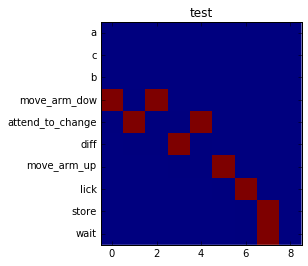

In [65]:
print range(len(sequence['names']))

print i_s.i2w
print i_s.w2i

i_s.w2i[sequence['names'][8]]
sequence['order'][8]


print dms_object.sequence
print dms_object.sequence['names']
print dms_object.sequence['names'][1]
range(len(dms_object.sequence['names']))

dms_object.connect()
print dms_object.M

%matplotlib inline
pl.imshow(dms_object.M, interpolation='none')

pl.gca().set_yticks(np.arange(len(i_s.w2i.keys())))
_ = pl.gca().set_yticklabels(i_s.w2i.keys())
_ = pl.gca().set_title('test')

In [64]:
print i_s.w2i.keys()

['a', 'c', 'b', 'move_arm_dow', 'attend_to_change', 'diff', 'move_arm_up', 'lick', 'store', 'wait']


### Create supported dimension

In [5]:
class Support:
    
    def __init__(self, name, tstr_min=1, tstr_max=10, buff_len=30, k=8, dtime = 0.001, len_time=10):
        self.name = name
        self.tstr_min = tstr_min
        self.tstr_max = tstr_max
        self.buff_len = buff_len
        self.k = k
        self.dtime = dtime
        self.len_time = len_time
        
        self.N = self.buff_len+2*self.k
        self.Nt = int(self.len_time/self.dtime)

        #Create power-law growing Taustarlist and corresponding s
        alpha = (self.tstr_max/self.tstr_min)**(1./buff_len)-1
        pow_vec = np.arange(-self.k,buff_len + self.k) #-1
        self._Taustarlist = self.tstr_min * (1 + alpha)**pow_vec

        s = self.k/self._Taustarlist
        
        #Create DerivMatrix
        self._DerivMatrix = np.zeros((self.N,self.N))
        for i in range(1,self.N-1):
            self._DerivMatrix[i, i-1] = -(s[i+1]-s[i])/(s[i]-s[i-1])/(s[i+1] - s[i-1])
            self._DerivMatrix[i, i] = ((s[i+1]-s[i])/(s[i]- s[i-1])-(s[i]-s[i-1])/(s[i+1]-s[i]))/(s[i+1] - s[i-1])
            self._DerivMatrix[i, i+1] = (s[i]-s[i-1])/(s[i+1]-s[i])/(s[i+1] - s[i-1])

        self.t = np.zeros((self.N,self.Nt))
        self.T = np.zeros((self.N,self.Nt))
        self._s = s
        
    def update(self, time_index, f):
        time_index = time_index + 1
        self.t[:,time_index] = self.t[:,time_index-1]+((-self._s.T*self.t[:,time_index-1]+f[time_index])*self.dtime)
        t_diff = np.dot(np.linalg.matrix_power(self._DerivMatrix, self.k), self.t[:,time_index])
        L1 = (-1)**self.k*self._s**(self.k+1) # this can be taken out
        L2 = t_diff/factorial(self.k)
        self.T[:,time_index] = L1.T*L2.T
                

Test that scale-invaraint memory (big T) works properly

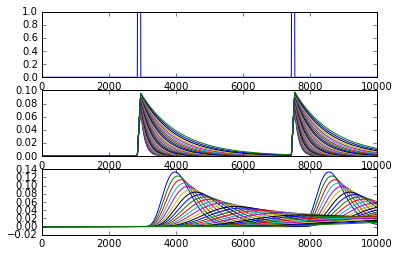

In [6]:
tmp = Support(name='neuron1')
f = np.concatenate((np.zeros(2850), np.ones(100), np.zeros(4500), np.ones(100), np.zeros(2450)))
for time in range(9999):
    tmp.update(time,f)
%matplotlib inline
pl.subplot(311)
_ = pl.plot(f.T)
pl.subplot(312)
_ = pl.plot(tmp.t[tmp.k:-tmp.k,:].T)
pl.subplot(313)
_ = pl.plot(tmp.T[tmp.k:-tmp.k,:].T)

### Display netwrok structure across time

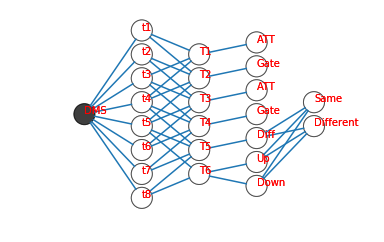

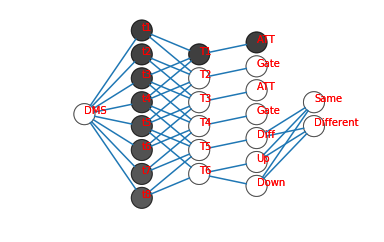

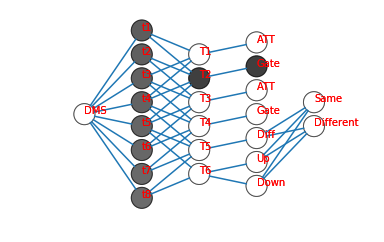

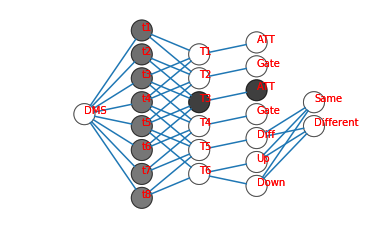

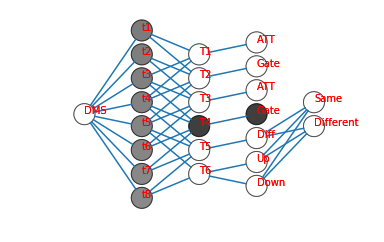

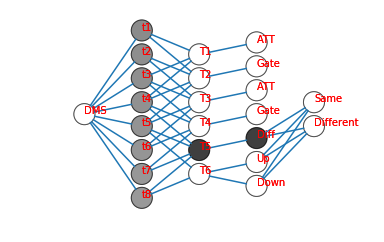

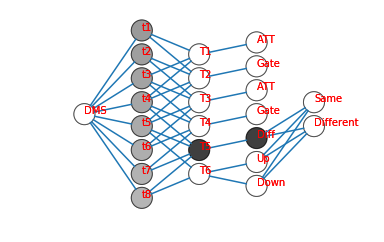

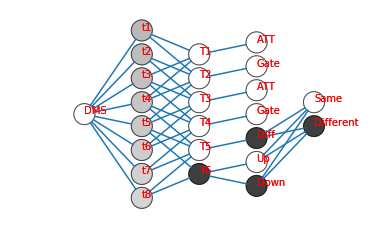

In [16]:
# based on a fork from https://github.com/miloharper/visualise-neural-network
# for a cool example see here: 
# https://medium.com/deep-learning-101/how-to-generate-a-video-of-a-neural-network-learning-in-python-62f5c520e85c


from matplotlib import pyplot
from math import cos, sin, atan
import numpy as np


class Neuron():
    def __init__(self, x, y, text = '', c=[None]):
        if c is [None]:
            c = np.ones(len(self.neurons))
        self.x = y
        self.y = x
        self.text = text
        self.c = c

    def draw(self):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, 
                               edgecolor=(0,0,0), alpha=0.5, facecolor=(self.c,self.c,self.c))
        text_string = pyplot.Text(self.x, self.y, self.text, color='r')
        pyplot.gca().add_patch(circle)
        pyplot.gca().add_artist(text_string)
        
        


class Layer():
    def __init__(self, network, number_of_neurons, test, c=[None]):
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.intialise_neurons(number_of_neurons, test, c)

    def intialise_neurons(self, number_of_neurons, text, c=[None]):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in xrange(number_of_neurons):
            self.text = text[number_of_neurons-iteration-1]
            self.c = c[number_of_neurons-iteration-1]
            neuron = Neuron(x, self.y, self.text, self.c)
            neurons.append(neuron)
            x += horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return horizontal_distance_between_neurons * (number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = neuron_radius * sin(angle)
        y_adjustment = neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), 
                             (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self):
        for neuron in self.neurons:
            neuron.draw()
            #if self.previous_layer:
            #    for previous_layer_neuron in self.previous_layer.neurons:
            #        self.__line_between_two_neurons(neuron, previous_layer_neuron)


class NeuralNetwork():
    def __init__(self):
        self.layers = []

    def add_layer(self, number_of_neurons, text, c=[None]):
        self.layer = Layer(self, number_of_neurons, text, c)
        self.layers.append(self.layer)

    def draw(self):
        for layer in self.layers:
            layer.draw()
            
            

def draw_dms(): 
    
    network.draw()        
    l0 = network.layers[0]
    l1 = network.layers[1]
    l2 = network.layers[2]
    l3 = network.layers[3]
    l4 = network.layers[4]
    
    for neuron in range(len(l1.neurons)/2):
        network.layer.line_between_two_neurons(l0.neurons[0], l1.neurons[neuron])
    for neuron in range(len(l1.neurons)/2):
        network.layer.line_between_two_neurons(l1.neurons[-neuron-1], l0.neurons[0])
    
    for neuron in range(len(l2.neurons)):
        network.layer.line_between_two_neurons(l2.neurons[neuron], l1.neurons[neuron])
    
    for neuron in range(1, len(l2.neurons)):
        network.layer.line_between_two_neurons(l2.neurons[neuron], l1.neurons[neuron-1])
    
    for neuron in range(1, len(l2.neurons)):
        network.layer.line_between_two_neurons(l1.neurons[-neuron], l2.neurons[-neuron])
        
    for neuron in range(1, len(l2.neurons)):
        network.layer.line_between_two_neurons(l1.neurons[-neuron], l2.neurons[-neuron-1])
        
    
    network.layer.line_between_two_neurons(l3.neurons[-1], l2.neurons[-1])
    network.layer.line_between_two_neurons(l3.neurons[-2], l2.neurons[-2])
    network.layer.line_between_two_neurons(l3.neurons[-3], l2.neurons[-3])
    network.layer.line_between_two_neurons(l3.neurons[-4], l2.neurons[-4])
    network.layer.line_between_two_neurons(l3.neurons[-5], l2.neurons[-5])
    network.layer.line_between_two_neurons(l3.neurons[-6], l2.neurons[-6])
    network.layer.line_between_two_neurons(l2.neurons[-6], l3.neurons[-7])
    
    network.layer.line_between_two_neurons(l4.neurons[-1], l3.neurons[-5])
    network.layer.line_between_two_neurons(l4.neurons[-2], l3.neurons[-5])
    network.layer.line_between_two_neurons(l4.neurons[-1], l3.neurons[-6])
    network.layer.line_between_two_neurons(l4.neurons[-1], l3.neurons[-7])
    network.layer.line_between_two_neurons(l4.neurons[-2], l3.neurons[-6])
    network.layer.line_between_two_neurons(l4.neurons[-2], l3.neurons[-7])
    
    
    pyplot.axis('scaled')
    pyplot.axis('off')
    pyplot.xlim(-5, 30)
    #aa = l4.neurons[1]
    #aa.x = 35
    #aa.draw()
    #network = network.layers[0].draw(fill=True)
    network.draw()
    pyplot.show()
        
# set params
vertical_distance_between_layers = 6
horizontal_distance_between_neurons = 2.5
neuron_radius = 1.1#0.5
number_of_neurons_in_widest_layer = 8

%matplotlib inline

# time 1
network = NeuralNetwork()
network.add_layer(1,['DMS'],[0])
network.add_layer(8,['t1','t2','t3','t4','t5','t6','t7','t8'],[1]*8)
network.add_layer(6,['T1','T2','T3','T4','T5','T6'],[1]*6)
network.add_layer(7,['ATT','Gate','ATT','Gate','Diff','Up','Down'],[1]*7)
network.add_layer(2,['Same','Different'],[1]*2)
draw_dms()

# time 2
network = NeuralNetwork()
network.add_layer(1,['DMS'],[1])
network.add_layer(8,['t1','t2','t3','t4','t5','t6','t7','t8'],np.arange(0.,0.16,0.02))
network.add_layer(6,['T1','T2','T3','T4','T5','T6'],[0,1,1,1,1,1])
network.add_layer(7,['ATT','Gate','ATT','Gate','Diff','Up','Down'],[0,1,1,1,1,1,1])
network.add_layer(2,['Same','Different'],[1]*2)
draw_dms()

# time 3
network = NeuralNetwork()
network.add_layer(1,['DMS'],[1])
network.add_layer(8,['t1','t2','t3','t4','t5','t6','t7','t8'],np.arange(0.16,0.24,0.01))
network.add_layer(6,['T1','T2','T3','T4','T5','T6'],[1,0,1,1,1,1])
network.add_layer(7,['ATT','Gate','ATT','Gate','Diff','Up','Down'],[1,0,1,1,1,1,1])
network.add_layer(2,['Same','Different'],[1]*2)
draw_dms()

# time 4
network = NeuralNetwork()
network.add_layer(1,['DMS'],[1])
network.add_layer(8,['t1','t2','t3','t4','t5','t6','t7','t8'],np.arange(0.24,0.32,0.01))
network.add_layer(6,['T1','T2','T3','T4','T5','T6'],[1,1,0,1,1,1])
network.add_layer(7,['ATT','Gate','ATT','Gate','Diff','Up','Down'],[1,1,0,1,1,1,1])
network.add_layer(2,['Same','Different'],[1]*2)
draw_dms()

# time 5
network = NeuralNetwork()
network.add_layer(1,['DMS'],[1])
network.add_layer(8,['t1','t2','t3','t4','t5','t6','t7','t8'],np.arange(0.32,0.4,0.01))
network.add_layer(6,['T1','T2','T3','T4','T5','T6'],[1,1,1,0,1,1])
network.add_layer(7,['ATT','Gate','ATT','Gate','Diff','Up','Down'],[1,1,1,0,1,1,1])
network.add_layer(2,['Same','Different'],[1]*2)
draw_dms()

# time 6
network = NeuralNetwork()
network.add_layer(1,['DMS'],[1])
network.add_layer(8,['t1','t2','t3','t4','t5','t6','t7','t8'],np.arange(0.4,0.48,0.01))
network.add_layer(6,['T1','T2','T3','T4','T5','T6'],[1,1,1,1,0,1])
network.add_layer(7,['ATT','Gate','ATT','Gate','Diff','Up','Down'],[1,1,1,1,0,1,1])
network.add_layer(2,['Same','Different'],[1]*2)
draw_dms()

# time 7
network = NeuralNetwork()
network.add_layer(1,['DMS'],[1])
network.add_layer(8,['t1','t2','t3','t4','t5','t6','t7','t8'],np.arange(0.48,0.64,0.02))
network.add_layer(6,['T1','T2','T3','T4','T5','T6'],[1,1,1,1,0,1])
network.add_layer(7,['ATT','Gate','ATT','Gate','Diff','Up','Down'],[1,1,1,1,0,1,1])
network.add_layer(2,['Same','Different'],[1]*2)
draw_dms()

# time 7
network = NeuralNetwork()
network.add_layer(1,['DMS'],[1])
network.add_layer(8,['t1','t2','t3','t4','t5','t6','t7','t8'],np.arange(0.64,0.96,0.02))
network.add_layer(6,['T1','T2','T3','T4','T5','T6'],[1,1,1,1,1,0])
network.add_layer(7,['ATT','Gate','ATT','Gate','Diff','Up','Down'],[1,1,1,1,0,1,0])
network.add_layer(2,['Same','Different'],[1, 0])
draw_dms()